In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt


2026-01-22 18:09:17.070423: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-22 18:09:17.118567: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-22 18:09:18.213659: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")


In [3]:
x_train.shape, x_test.shape

((3601, 500), (1320, 500))

In [4]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0)) # get all unique labels

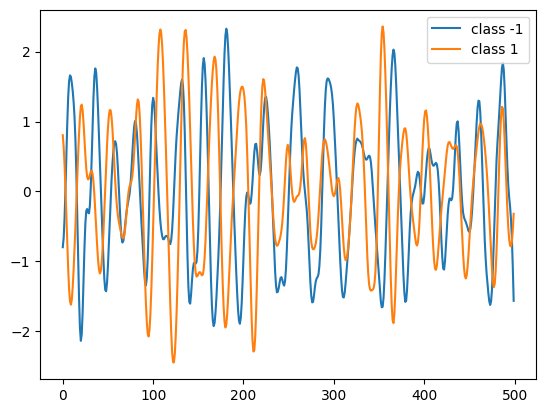

In [5]:
plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend()
plt.show()
plt.close()

In [6]:
import pandas as pd

In [7]:
df_x_train = pd.DataFrame(x_train)
df_x_test = pd.DataFrame(x_test) 

In [8]:
df_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,...,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000
mean,-0.016708,-0.015270,-0.013605,-0.011943,-0.009966,-0.007062,-0.003495,0.000568,0.005354,0.010032,...,0.008724,0.006895,0.004053,0.000929,-0.001922,-0.003369,-0.003237,-0.001820,0.000031,0.001395
std,1.058455,1.051904,1.044560,1.042573,1.046933,1.052829,1.055439,1.054305,1.050424,1.044120,...,1.037718,1.040632,1.040826,1.036657,1.028358,1.018719,1.011871,1.012367,1.020914,1.032490
min,-3.933454,-3.656912,-3.479467,-3.595350,-3.773891,-3.914729,-3.855301,-4.497360,-4.552591,-4.000282,...,-4.402103,-4.073011,-4.014450,-3.817036,-3.574256,-3.746353,-3.680805,-3.904569,-4.221550,-4.076032
25%,-0.685693,-0.699526,-0.688302,-0.709732,-0.694991,-0.691035,-0.690316,-0.701244,-0.675094,-0.687749,...,-0.664482,-0.690143,-0.688232,-0.677701,-0.674282,-0.655946,-0.657258,-0.664392,-0.659578,-0.675838
50%,-0.007573,-0.003044,-0.003066,0.008598,0.001042,0.000280,-0.011988,-0.026672,-0.002031,0.010602,...,-0.001031,0.012348,0.003914,0.005957,-0.002728,-0.010841,-0.008002,-0.004802,-0.013723,-0.003186
75%,0.660360,0.674898,0.683698,0.679474,0.697530,0.688802,0.721442,0.705021,0.692256,0.689118,...,0.696860,0.714817,0.707357,0.692837,0.666434,0.668463,0.671536,0.677346,0.684048,0.682921
max,3.503936,3.369278,3.498286,3.493830,3.293318,3.605585,3.895870,3.741035,3.630933,3.579176,...,3.971919,3.522197,3.842693,3.916653,3.670118,3.567879,3.471847,3.798079,3.863325,4.349744


In [9]:
df_x_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,0.056002,0.049911,0.038884,0.024069,0.007442,-0.008919,-0.023495,-0.033577,-0.038521,-0.040075,...,-0.021316,-0.020576,-0.021015,-0.022640,-0.024066,-0.024627,-0.023277,-0.019195,-0.012905,-0.004523
std,1.030455,1.027540,1.031559,1.037225,1.040995,1.041183,1.039772,1.037450,1.032377,1.023538,...,0.997735,0.998892,1.003871,1.005505,1.001538,0.995777,0.995949,1.006263,1.021453,1.034000
min,-3.295308,-3.114238,-3.143402,-3.210066,-3.488749,-3.297407,-3.530643,-3.614145,-3.499086,-3.891793,...,-3.191013,-2.759400,-2.923191,-3.345666,-3.640661,-3.644451,-3.323366,-3.675281,-4.136622,-4.339612
25%,-0.615181,-0.622534,-0.647919,-0.703829,-0.710411,-0.704157,-0.701900,-0.726534,-0.725647,-0.710225,...,-0.659487,-0.667106,-0.675032,-0.701321,-0.666676,-0.639500,-0.675741,-0.684490,-0.703068,-0.668710
50%,0.060755,0.063215,0.072926,0.046643,-0.001561,-0.033439,-0.069241,-0.038386,-0.039849,-0.054609,...,-0.034602,-0.025947,-0.018705,-0.023850,-0.047472,-0.059076,-0.055777,-0.062619,-0.038624,-0.010347
75%,0.725193,0.683444,0.708510,0.721956,0.711720,0.667813,0.662852,0.670717,0.656110,0.634353,...,0.636785,0.645742,0.627622,0.626097,0.627942,0.618566,0.635043,0.610605,0.618785,0.642833
max,3.972283,3.854763,3.500758,3.425150,3.603918,3.498317,3.202631,3.149192,3.149306,3.044482,...,3.171020,3.038886,3.307455,3.440595,3.372724,3.878029,4.130681,4.099100,3.791179,3.696551


### <center>Data is z-normalized and univariate</center>

---

Transform into multivariate, so we can use multivariate models

In [10]:
x_train.shape[0]

3601

In [11]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [12]:
num_classes = len(np.unique(y_train))

In [13]:
num_classes

2

In [14]:
# shuffle
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [15]:
# standardize
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [16]:
def create_model(input_shape):
    input_layer = keras.layers.Input(input_shape)
    
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    
    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    
    gap = keras.layers.GlobalAveragePooling1D()(conv3)
    
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)
    
    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [17]:
x_train.shape

(3601, 500, 1)

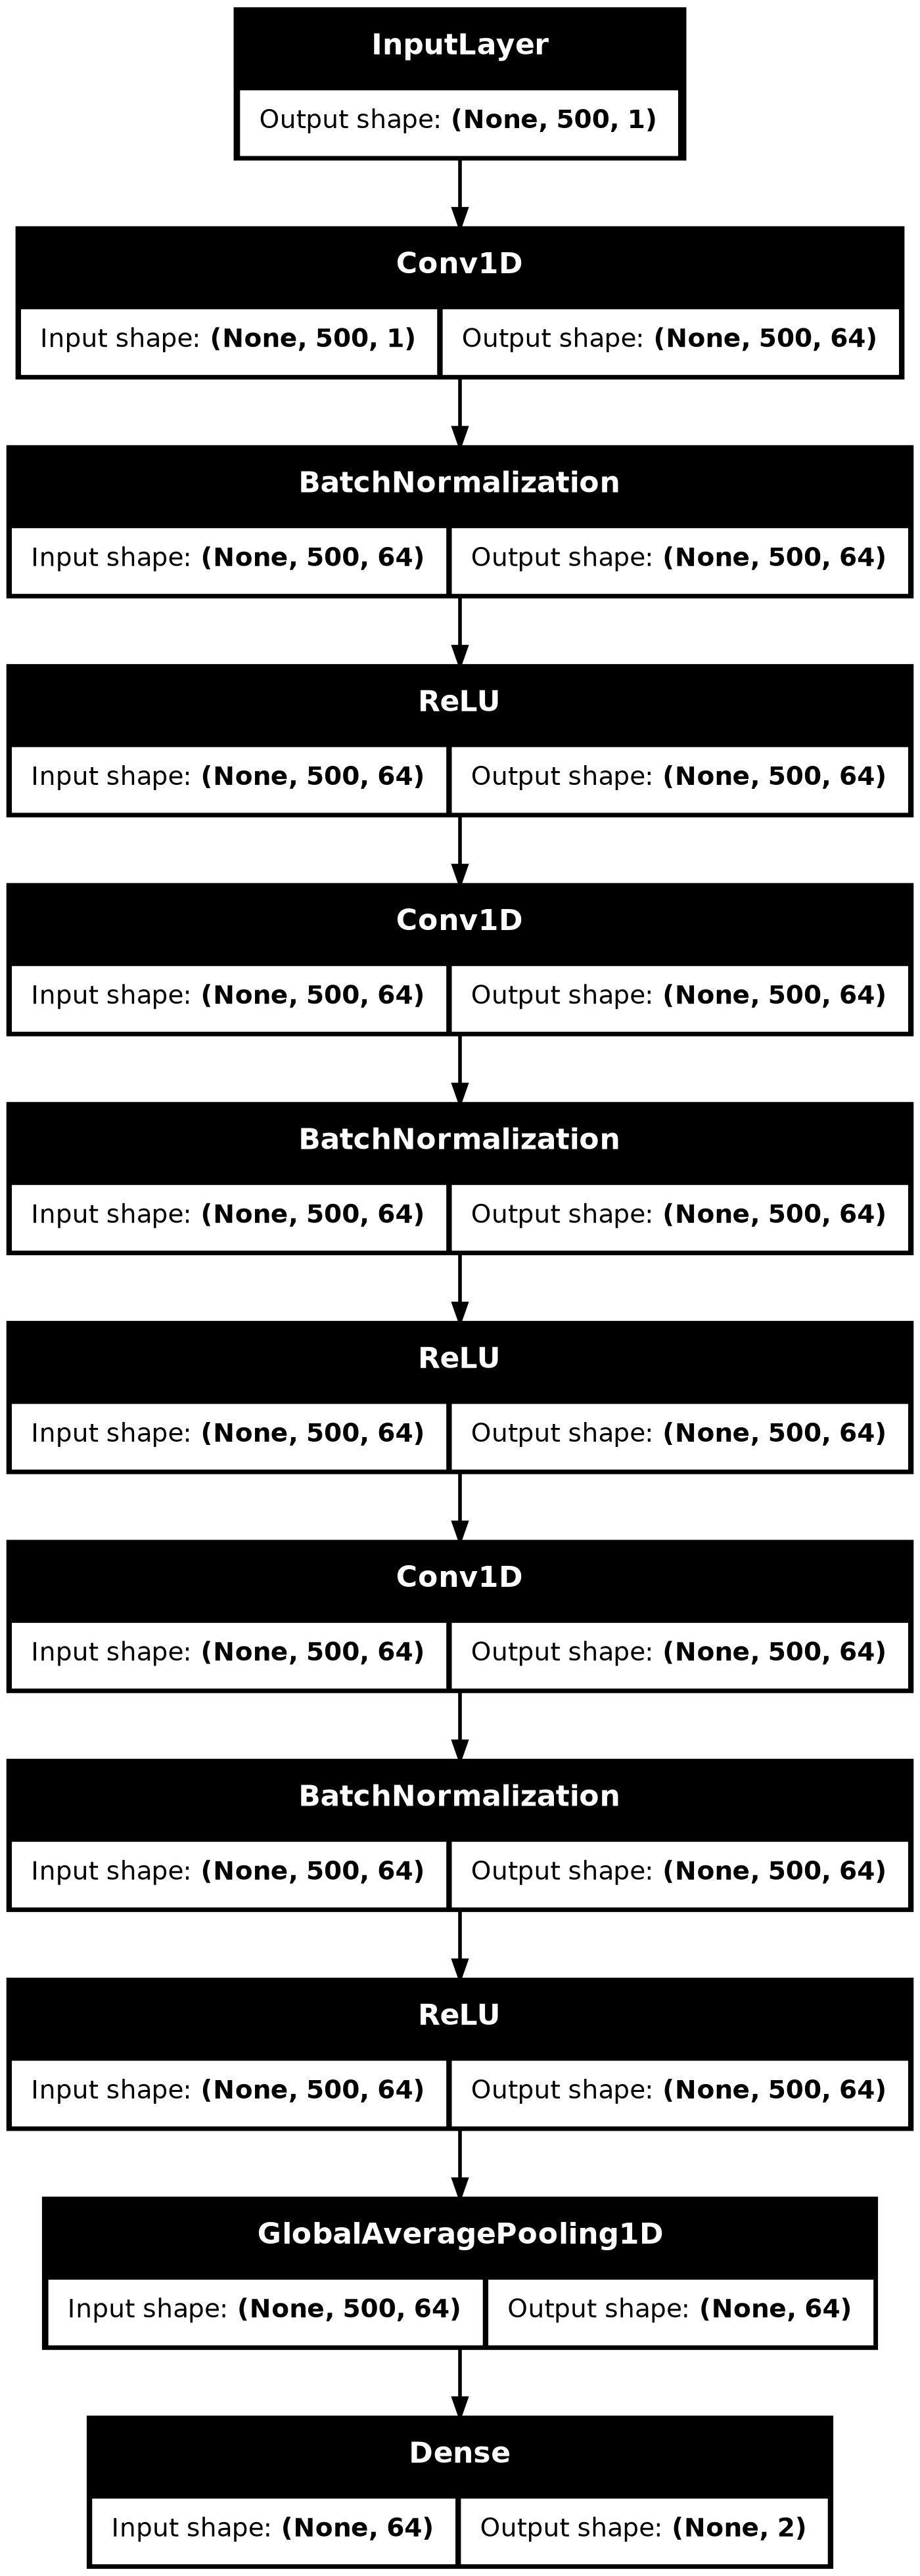

In [21]:
model = create_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

### Ready for model training
---

In [22]:
epochs = 500
batch_size = 32

In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=50, verbose=1
    )
]

In [43]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [44]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9622 - loss: 0.1023 - val_accuracy: 0.9029 - val_loss: 0.2267 - learning_rate: 0.0010
Epoch 2/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9684 - loss: 0.0909 - val_accuracy: 0.8946 - val_loss: 0.2319 - learning_rate: 0.0010
Epoch 3/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9722 - loss: 0.0832 - val_accuracy: 0.8724 - val_loss: 0.2529 - learning_rate: 0.0010
Epoch 4/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9712 - loss: 0.0852 - val_accuracy: 0.8932 - val_loss: 0.2205 - learning_rate: 0.0010
Epoch 5/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9653 - loss: 0.0903 - val_accuracy: 0.8974 - val_loss: 0.2340 - learning_rate: 0.0010
Epoch 6/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9719 - loss: 0.0802 - val_accuracy: 0.8211 - val_loss: 0.4009 - learning_rate: 0.0010
Epoch 7/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9691 - loss: 0.0911 - 

In [45]:
# model = keras.models.load_model("best_model.keras")

In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0987 - sparse_categorical_crossentropy: 0.0987


In [51]:
print("Test accuracy:", test_acc)

Test accuracy: 0.09871231019496918


In [52]:
print("Test loss:", test_loss)

Test loss: 0.09871231019496918


In [42]:
test_acc == test_loss

True